In [1]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pandas as pd

In [2]:
data = pd.read_csv('spam.csv', encoding='latin1')
df = pd.DataFrame(data)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df = df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [6]:
def preprocess(message):
    message = re.sub(r'[^a-zA-Z]', ' ' , message)
    message = message.lower()
    message = message.split()
    stemmer = PorterStemmer()
    message = [ stemmer.stem(word) for word in message if word not in set(stopwords.words("english"))]
    return " ".join(message)

In [7]:
df['processed_messages'] = df['v2'].apply(preprocess)

In [8]:
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

In [9]:
df

,v1,v2,processed_messages
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,nd time tri contact u u pound prize claim easi...
5568,0,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [10]:
X = df['processed_messages']
y = df['v1']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X , y, random_state = 42 , test_size=0.25)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [14]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [15]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

In [16]:
model.fit(X_train_vec , y_train)

MultinomialNB()

In [17]:
y_pred = model.predict(X_test_vec)

In [18]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [19]:
acc = accuracy_score(y_test , y_pred)
cf = confusion_matrix(y_test , y_pred)

In [20]:
print(f"Accuracy : {acc*100 :.2f}%")
print(f"Accuracy : \n{cf}")

Accuracy : 98.35%
Accuracy : 
[[1195    7]
 [  16  175]]


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

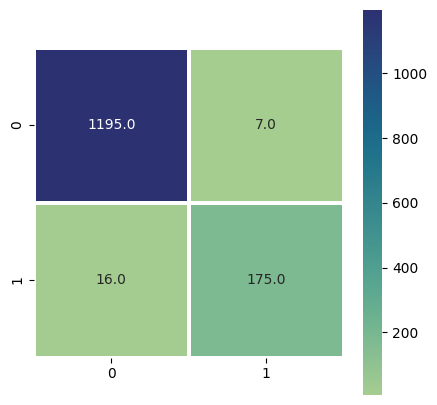

In [22]:
plt.figure(figsize=(5,5))
sns.heatmap(cf , annot=True , fmt = '.1f' , linewidth=1.5 , cmap='crest' , square=True)
plt.show()